<a href="https://colab.research.google.com/github/SudiptaSahaNiloy/Atcoder_solutions/blob/master/Niloy_Research_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0



--2021-05-11 05:18:47--  https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda [following]
--2021-05-11 05:18:48--  https://www.dropbox.com/sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccc68b3a4cdfb46dd6aa4aef8c4.dl.dropboxusercontent.com/zip_download_get/Axr2N1k7cUkdJJDbL_DZHwth-zkZJ5arHDrmGaevyuV6fFGf_cdDSXfPn_jqVWyH-ymO7X0yOUOLfLDQ8lH_srBdpF6bityLOFO6z9fxRSRgBQ [following]
--2021-05-11 05:18:53--  https://uccc68b3a4cdfb46dd6aa4aef8c4.dl.dropboxusercontent.com/zip_download_get/Axr2N1k7cUkdJJDbL_DZHwth-zkZJ5arHDrmGaevyuV6fFGf_cdDSXfPn_jqVWyH-ymO7X0yOUOLfLDQ8

In [ ]:
!unzip AADEmpop2CjJymIZ3QXkELpda?dl=0


Streaming output truncated to the last 5000 lines.
 extracting: Test/Normal/NORMAL_test_615.jpg  
 extracting: Train/Covid/COVID_train_422.jpg  
 extracting: Test/Normal/NORMAL_test_300.jpg  
 extracting: Test/Normal/NORMAL_test_686.jpg  
 extracting: Train/Covid/COVID_train_284.jpg  
 extracting: Test/Normal/NORMAL_test_165.jpg  
 extracting: Test/Normal/NORMAL_test_519.jpg  
 extracting: Train/Normal/NORMAL_train_5.jpg  
 extracting: Train/Covid/COVID_train_925.jpg  
 extracting: Test/Normal/NORMAL_test_295.jpg  
 extracting: Train/Covid/COVID_train_676.jpg  
 extracting: Test/Normal/NORMAL_test_702.jpg  
 extracting: Train/Covid/COVID_train_540.jpg  
 extracting: Test/Normal/NORMAL_test_781.jpg  
 extracting: Train/Covid/COVID_train_415.jpg  
 extracting: Train/Covid/COVID_train_843.jpg  
 extracting: Train/Covid/COVID_train_583.jpg  
 extracting: Train/Covid/COVID_train_439.jpg  
 extracting: Test/Normal/NORMAL_test_420.jpg  
 extracting: Test/Normal/NORMAL_test_318.jpg  
 extracti

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorboard

X_train_path = "/content/Train"
X_test_path = "/content/Test"
Val_test_path = "/content/Val"

# design the traing dataset
train_datagen = image.ImageDataGenerator(
    rescale=1/255,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True
)

X_train = train_datagen.flow_from_directory(
    X_train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode = "binary"
)

# design the test dataset
test_datagen = image.ImageDataGenerator(rescale=1/255)

X_test = test_datagen.flow_from_directory(
    X_test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# design the test dataset
Val_datagen = image.ImageDataGenerator(rescale=1/255)

Val_test = test_datagen.flow_from_directory(
    Val_test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# print(X_train.samples)
# y_train = X_train.classes
# y_test = X_test.classes


Found 5581 images belonging to 2 classes.
Found 1860 images belonging to 2 classes.
Found 1862 images belonging to 2 classes.


Epoch 1/10
175/175 [==============================] - 73s 399ms/step - loss: 1.5295 - accuracy: 0.7091 - val_loss: 0.6836 - val_accuracy: 0.8179
Epoch 2/10
175/175 [==============================] - 68s 392ms/step - loss: 0.4810 - accuracy: 0.8694 - val_loss: 0.5961 - val_accuracy: 0.8647
Epoch 3/10
175/175 [==============================] - 68s 391ms/step - loss: 0.3696 - accuracy: 0.8951 - val_loss: 0.5160 - val_accuracy: 0.8614
Epoch 4/10
175/175 [==============================] - 69s 393ms/step - loss: 0.3148 - accuracy: 0.9048 - val_loss: 0.4254 - val_accuracy: 0.8910
Epoch 5/10
175/175 [==============================] - 69s 393ms/step - loss: 0.2622 - accuracy: 0.9118 - val_loss: 0.4720 - val_accuracy: 0.8786
Epoch 6/10
175/175 [==============================] - 69s 396ms/step - loss: 0.2172 - accuracy: 0.9317 - val_loss: 0.3981 - val_accuracy: 0.8931
Epoch 7/10
175/175 [==============================] - 69s 396ms/step - loss: 0.1881 - accuracy: 0.9318 - val_loss: 0.3848 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

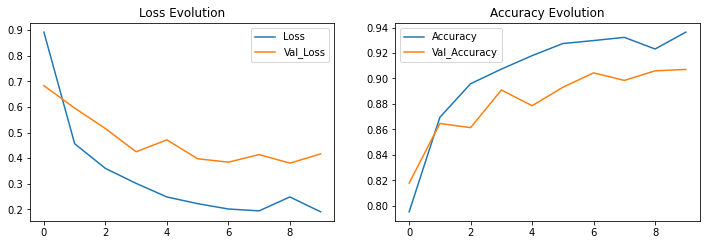

In [26]:
# TL Model
base_model = keras.applications.ResNet50V2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test))

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
